In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#visual configuration
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
sentiments = pd.read_csv("export/text_sent.csv")

In [4]:
sentiments.sample(3)

,tit,tex,tex_en,tok_en,sentiments,polaridad,subjetividad,neg,neu,pos,compound,num_pal
27,Tic Tac,"Somos carne de Cupido medio hecha, de sentimie...","We are half-made cupid meat, of raw feelings.A...",half cupid meat raw feeling apple wish arrow t...,"[0.03418803418803418, 0.4427350427350427, 0.14...",0.034188,0.442735,0.148,0.649,0.202,0.4404,635
44,Mi autobiografía en 5 tuits.,"""Soy un electroduende y nadie me comprende"" y ...","""I am an electrodunde and nobody understands m...",electrodunde understand year old wake desire s...,"[0.0, 0.13541666666666669, 0.32, 0.608, 0.071,...",0.000000,0.135417,0.320,0.608,0.071,-0.8555,588
17,Reincidencia,"Él era muro, ella conducía con los ojos vendad...","He was wall, she drove her blindfolded eyes.Af...",wall drive blindfold eye crash wake kilometer ...,"[-0.05, 0.4, 0.147, 0.764, 0.089, -0.4215]",-0.050000,0.400000,0.147,0.764,0.089,-0.4215,677


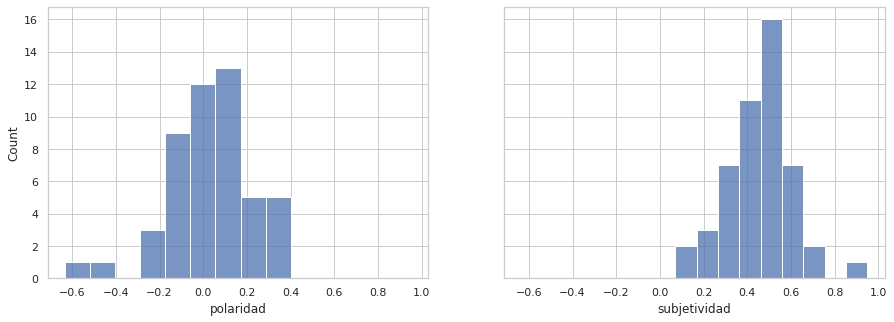

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["polaridad"],ax=axs[0])
sns.histplot(sentiments["subjetividad"],ax=axs[1]);

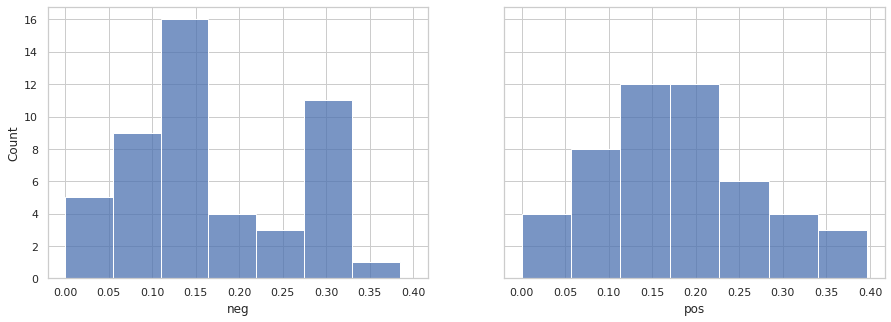

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["neg"],ax=axs[0])
sns.histplot(sentiments["pos"],ax=axs[1]);

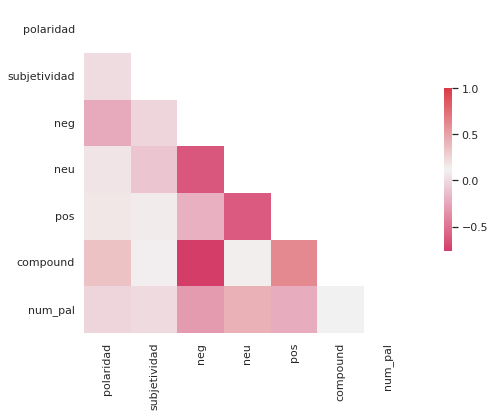

In [11]:
corr = sentiments.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);